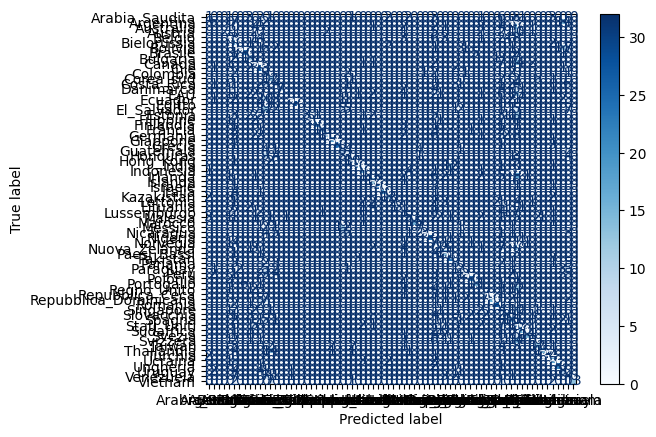

                       precision    recall  f1-score   support

       Arabia_Saudita       0.11      0.03      0.05        35
            Argentina       0.43      0.17      0.24        35
            Australia       0.00      0.00      0.00        35
              Austria       1.00      0.07      0.13        29
               Belgio       0.00      0.00      0.00        35
          Bielorussia       0.14      0.67      0.23        24
              Bolivia       0.00      0.00      0.00        33
              Brasile       0.78      0.70      0.74        30
             Bulgaria       0.34      0.41      0.37        27
               Canada       0.09      0.10      0.09        31
                 Cile       0.34      0.68      0.46        38
             Colombia       0.09      0.45      0.15        20
            Corea_sud       0.29      0.48      0.36        25
           Costa_Rica       0.12      0.12      0.12        32
            Danimarca       1.00      0.27      0.42  

In [1]:
from datetime import datetime
from collections import Counter
from unittest import result
from joblib import PrintTime

# Data management
import pandas as pd
import csv

# Data preprocessing and trasformation (ETL)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml, load_iris, make_moons, make_classification
from sklearn.model_selection import train_test_split

# Math and Stat modules
import numpy as np
from scipy.stats import sem
from random import choice

# Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, accuracy_score, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#dataset_link_prediction = pd.read_csv('bello.csv')
dataset_link_prediction = pd.read_csv('machine-global-mergedfix2.csv')


generi = set()
with open('machine-global-mergedfix2.csv', 'r') as f:
    csv_reader = csv.reader(f)
    for line in csv_reader:
        s=line[3].replace("[","")
        s=s.replace("]","")
        s=s.replace("'","")
        genres = s.split(",")
        for genre in genres:
            if len(genre) > 0 and genre[0] == " ":
                genre = genre[1:]
            generi.add(genre)

for genere in generi:
    dataset_link_prediction[genere] = 0

#print(dataset_link_prediction)

riga = -1
with open('machine-global-mergedfix2.csv', 'r') as f:
    csv_reader = csv.reader(f)
    for line in csv_reader:
        if line[0] != 'paese':
            riga = riga+1
            s=line[3].replace("[","")
            s=s.replace("]","")
            s=s.replace("'","")
            genres = s.split(",")
            for genre in genres:
                if len(genre) > 0 and genre[0] == " ":
                    genre = genre[1:]
                dataset_link_prediction.loc[riga,genre] = 1

X = dataset_link_prediction.iloc[:, 4:] #feature matrix
y = dataset_link_prediction['paese'] # label

#print(dataset_link_prediction.loc[1,'art rock'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

clf_logreg = LogisticRegression()
clf_logreg.fit(X_train_minmax, y_train)

# Fai le predizioni sul set di test
X_test_minmax = min_max_scaler.transform(X_test)
y_predicted_lr = clf_logreg.predict(X_test_minmax)

# Calcola la matrice di confusione utilizzando y_test invece di y_train
conf_matrix = confusion_matrix(y_test, y_predicted_lr)

# Visualizza la matrice di confusione
ConfusionMatrixDisplay(conf_matrix, display_labels=clf_logreg.classes_).plot(cmap=plt.cm.Blues)
plt.show()

# Stampa il classification report utilizzando y_test invece di y_train
print(classification_report(y_test, y_predicted_lr))

# Calcola e stampa l'accuracy score utilizzando y_test invece di y_train
print(accuracy_score(y_test, y_predicted_lr))
